In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import svd
from plotnine import *

## Most

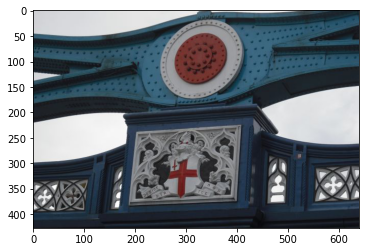

In [ ]:
most = plt.imread('most.jpg', format='jpeg')
plt.imshow(most)
plt.show()

In [ ]:
most_flat = most.reshape(427*640, 3)
most_sr = most_flat.mean(axis=1)
most_sr = most_sr.reshape(most.shape[:-1])

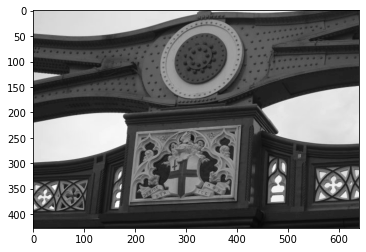

In [ ]:
plt.imshow(most_sr, cmap='gray')
plt.show()

In [ ]:
n = len(most_sr)
U, S, V = svd(most_sr)

print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz S ma wymiary {S.shape}')
print(f'Macierz V ma wymiary {V.shape}')

Macierz U ma wymiary (427, 427)
Macierz S ma wymiary (427,)
Macierz V ma wymiary (640, 640)


In [ ]:
k = 60
Uk=U[:,:k]
Sk=S[:k]
Vk=V[:k,:]

print(f'Macierz Uk ma wymiary {Uk.shape}')
print(f'Macierz Sk ma wymiary {Sk.shape}')
print(f'Macierz Vk ma wymiary {Vk.shape}')

Macierz Uk ma wymiary (427, 60)
Macierz Sk ma wymiary (60,)
Macierz Vk ma wymiary (60, 640)


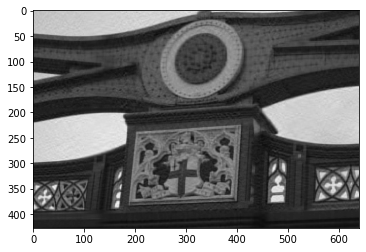

In [ ]:
obraz = np.matmul(np.matmul(Uk, np.diag(Sk)), Vk)
plt.imshow(obraz, cmap='gray')
plt.show()

In [ ]:
# Obrazy każdej wartości osobliwej

imgs = []

for i in range(60):
  imgs.append(S[i]*np.outer(U[:,i], V[i]))

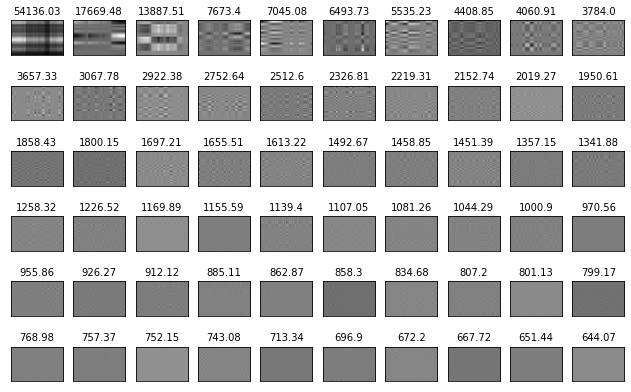

In [ ]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

In [ ]:
# Skumulowane obrazy kolejnych wartości osobliwych

imgs_razem = []
for i in range(60):
  imgs_razem.append(np.matmul(np.matmul(U[:,:i], np.diag(S[:i])), V[:i,:]))

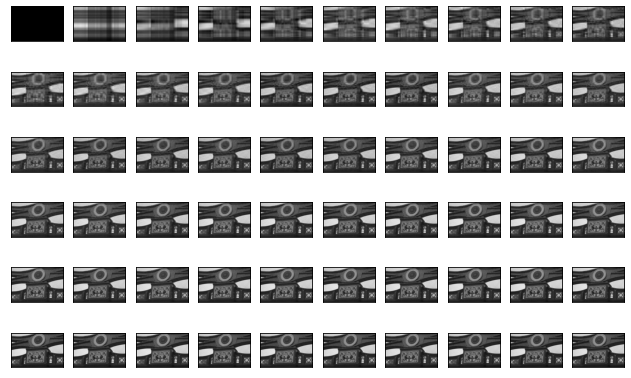

In [ ]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs_razem[i], cmap='gray')
plt.show()

## Serce

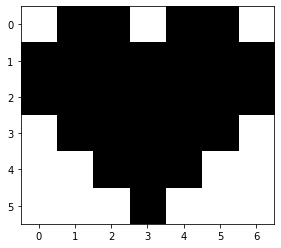

In [ ]:
serce = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
plt.imshow(1-serce, cmap='gray')
plt.show()

In [ ]:
n = len(serce)
U, S, V = svd(serce)
sigma = np.diag(S)

In [ ]:
# Obrazy każdej wartości osobliwej

imgs_s = []

for i in range(6):
  imgs_s.append(S[i]*np.outer(U[:,i], V[i]))

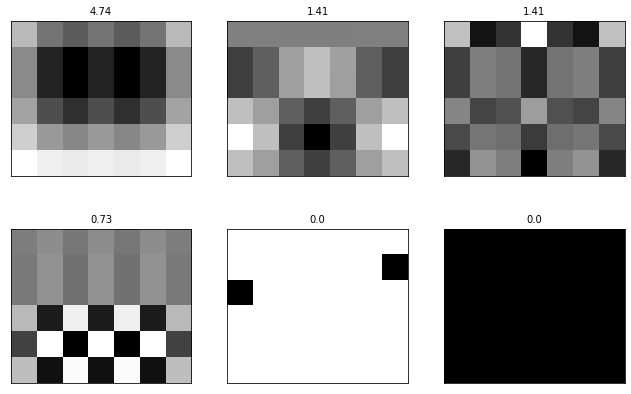

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-imgs_s[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

In [ ]:
# Skumulowane obrazy kolejnych wartości osobliwych

imgs_razem_s = []
for i in range(n):
  imgs_razem_s.append(np.matmul(np.matmul(U[:,:i], np.diag(S[:i])), V[:i,:]))

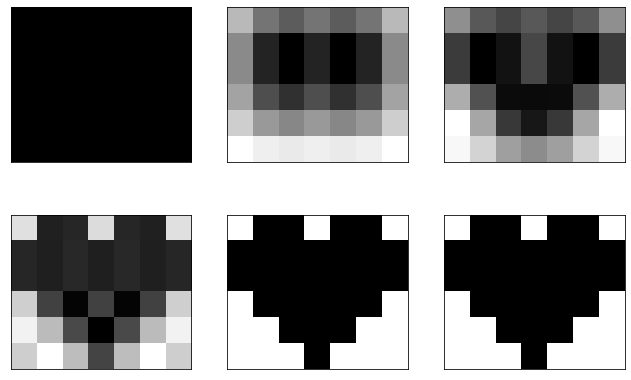

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-imgs_razem_s[i], cmap='gray')
plt.show()